In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv');
cpy=df.copy();
cpy


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
cpy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The Function to return a series value containing the proportion of unique values with a positive or negative Churn values

In [54]:
b=[]
def share(X,dec):
    b=[]
    for i in X.unique():
        b.append(len(cpy[cpy['Churn']==dec][X==i]))
    return pd.Series(b,index=X.unique())
share(cpy['PaymentMethod'],'Yes')

c:\users\askmu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
dtype: int64

Below is the code for the parameters that have led to the churn in customers.
The priority of the parameters are in the decreasing order of list

In [55]:
x=[]
for i in cpy.columns:
    if i=='Churn':
        break
    x.append(share(cpy[i],'Yes').max())
a=[]
for i in sorted(x,reverse=True):
    if i>=sum(x)/len(x):
        a.append(cpy.columns[x.index(i)])
a

c:\users\askmu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


['PhoneService',
 'Contract',
 'Dependents',
 'OnlineSecurity',
 'TechSupport',
 'PaperlessBilling',
 'SeniorCitizen',
 'InternetService',
 'OnlineBackup',
 'DeviceProtection',
 'Partner',
 'PaymentMethod']

The cell underneath contains the code for plotting the bar graphs for the chosen parameters

c:\users\askmu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


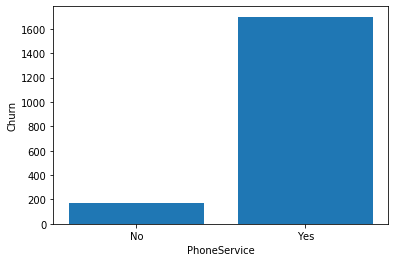

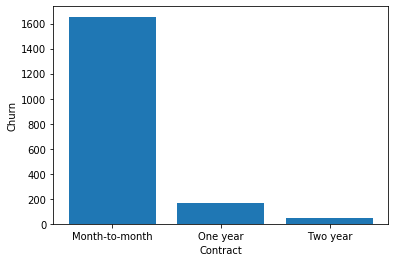

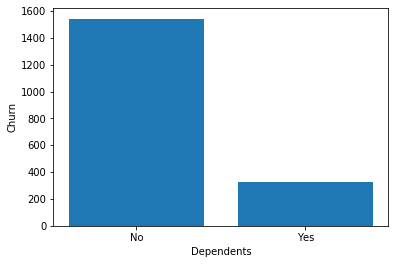

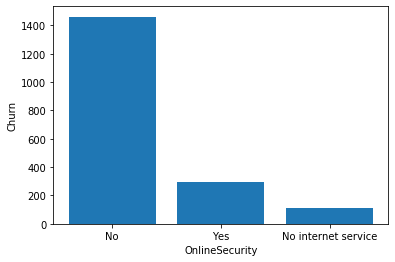

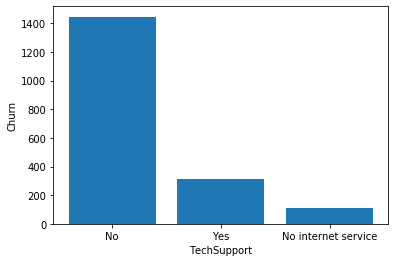

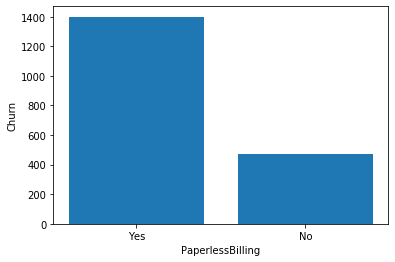

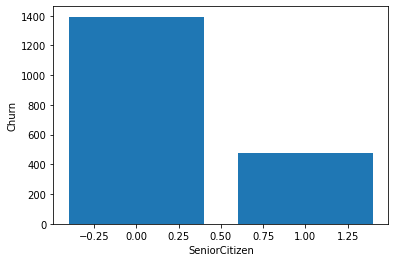

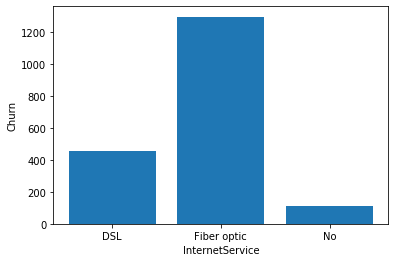

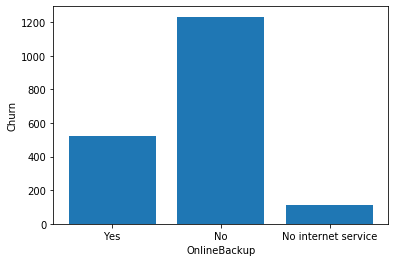

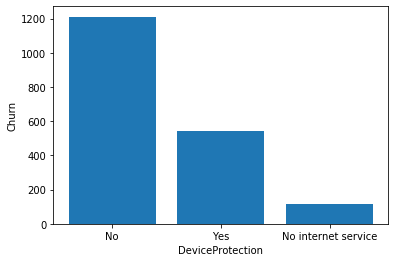

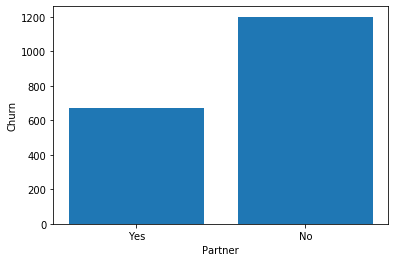

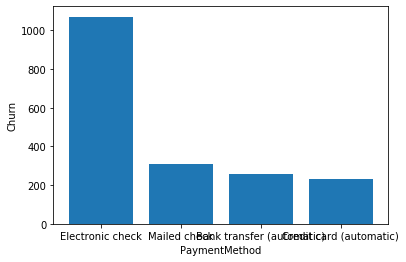

In [50]:
b=plt.bar(cpy['PhoneService'].unique(),share(cpy['PhoneService']))
plt.xlabel('PhoneService')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['Contract'].unique(),share(cpy['Contract']))
plt.xlabel('Contract')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['Dependents'].unique(),share(cpy['Dependents']))
plt.xlabel('Dependents')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['OnlineSecurity'].unique(),share(cpy['OnlineSecurity']))
plt.xlabel('OnlineSecurity')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['TechSupport'].unique(),share(cpy['TechSupport']))
plt.xlabel('TechSupport')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['PaperlessBilling'].unique(),share(cpy['PaperlessBilling']))
plt.xlabel('PaperlessBilling')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['SeniorCitizen'].unique(),share(cpy['SeniorCitizen']))
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['InternetService'].unique(),share(cpy['InternetService']))
plt.xlabel('InternetService')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['OnlineBackup'].unique(),share(cpy['OnlineBackup']))
plt.xlabel('OnlineBackup')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['DeviceProtection'].unique(),share(cpy['DeviceProtection']))
plt.xlabel('DeviceProtection')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['Partner'].unique(),share(cpy['Partner']))
plt.xlabel('Partner')
plt.ylabel('Churn')
plt.show()
b=plt.bar(cpy['PaymentMethod'].unique(),share(cpy['PaymentMethod']))
plt.xlabel('PaymentMethod')
plt.ylabel('Churn')
plt.show()